# projet IA

In [12]:

import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from glob import glob
import random
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import os

creation des deux fichier train70  et test30

In [2]:
listFolder = sorted(glob('/home/sks/Documents/SKs/machine learning/256_ObjectCategories/*'))
print(len(listFolder))
fileTrain = open('train70.txt','w')
fileTest = open('test30.txt','w')


257


stocker le path des images dans les fichiers texte test et train

In [3]:
for pathFolder in listFolder:
    listImage = glob(pathFolder+'/*.jpg')
    lenn = len(listImage)
    listTrain = random.sample(listImage,int(0.7*lenn))
    fileTrain.writelines('\n'.join(listTrain)+'\n')
    listTest = list(set(listImage)-set(listTrain))
    fileTest.writelines('\n'.join(listTest)+'\n')
    print(lenn,len(listTrain),len(listTest))
fileTrain.close()
fileTest.close()

/home/sks/Documents/SKs/machine learning/256_ObjectCategories/001.ak47
98 68 30
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/002.american-flag
97 67 30
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/003.backpack
151 105 46
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/004.baseball-bat
127 88 39
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/005.baseball-glove
148 103 45
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/006.basketball-hoop
90 62 28
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/007.bat
106 74 32
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/008.bathtub
232 162 70
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/009.bear
102 71 31
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/010.beer-mug
94 65 29
/home/sks/Documents/SKs/machine learning/256_ObjectCategories/011.billiards
278 194 84
/home/sks/Documents/SKs/machine learning/256_ObjectCateg

l'extraction de features en utilisant vgg16

In [5]:
PATH = '/home/sks/Documents/SKs/machine learning/train70.txt'
SAVEFOLDER = '/home/sks/Documents/SKs/machine learning/features'

model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')
for path in pathImages:
    temp = path.rfind('/')
    dirname = path[path[:temp].rfind('/')+1:temp]
    dirfolder = '{}/{}'.format(SAVEFOLDER,dirname)
    if not os.path.exists(dirfolder):
        os.mkdir(dirfolder)
        print(dirfolder)
    else :
        img_path = path
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        np.save('{}/{}'.format(dirfolder,path[temp+1:path.rfind('.')]),features)

KeyboardInterrupt: 

In [ ]:
PATH = '/home/sks/Documents/SKs/machine learning/test30.txt'
filename = 'ModelKmeans.sav'
SAVEFOLDER = '/home/sks/Documents/SKs/machine learning/features'


model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
#prepare data:
with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')

for path in pathImages:
    temp = path.rfind('/')
    dirname = path[path[:temp].rfind('/')+1:temp]
    dirfolder = '{}/{}'.format(SAVEFOLDER,dirname)

    img_path = path
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    np.save('{}/{}'.format(dirfolder,path[temp+1:path.rfind('.')]),features)



In [6]:
NCLUSTERS = 257

PATH = '/home/sks/Documents/SKs/machine learning/train70.txt'
filename = 'ModelKmeans.sav'

with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')
dataX = []
limit = 0
trainY=[]
for path in pathImages:
    temp = path.rfind('/')
    tag = path[path[:temp].rfind('/')+1:temp]
    trainY.append(tag)
trainY

['001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '002.american-flag',
 '002.american-flag',
 '002.american-flag',
 '002.american-flag',
 '002.american-flag',
 '002.

classifier les images en utilisant les features collecter depuis vgg16

In [8]:


dataXX = []
if not os.path.exists(filename):
    for path in pathImages:
        temp = path.rfind('/')
        pathFeature = '/home/sks/Documents/SKs/machine learning/features/{}.npy'.format(path[path[0:temp].rfind('/')+1:path.rfind('.')])
        # print(pathFeature)
        try:
            # print(pathFeature)
            dataXX.append(np.load(pathFeature)[0])
            # print(np.load(pathFeature))
        except:
            continue
    print('Prepare Data: Done!')
    # dataX = np.array(dataX)
    # print(dataX)
    clf = KMeans(n_clusters=256,random_state=0)
    clf.fit(dataXX)
    pickle.dump(clf, open(filename, 'wb'))
    # np.save('logLabel',clf.labels_)
    labels = clf.labels_
    print(type(clf.labels_))
    print(clf.cluster_centers_)
else:
    
    with open(filename, 'rb') as file:  
        clf = pickle.load(file)

    labels = clf.labels_
labels

Prepare Data: Done!
<class 'numpy.ndarray'>
[[ 1.55357520e-01  0.00000000e+00  2.61345009e-02 ...  1.38759025e+00
   5.31785359e-01  0.00000000e+00]
 [ 7.98272454e-01  4.35874074e-01  6.11667922e-02 ... -1.11022302e-16
   2.75068429e-01  2.22914145e+00]
 [ 1.12589941e+00  9.16961981e-01  4.42259397e-01 ...  9.81844078e-02
   5.30314451e-01  4.58353019e-01]
 ...
 [ 8.62129306e-01  3.84205290e-01  4.57404553e-01 ...  1.82193555e+00
   7.94429215e-01  1.86466129e+00]
 [ 1.27222181e-02  1.11151160e-03  2.22044605e-16 ...  5.31619667e-01
   4.39990848e-03  1.84923890e+00]
 [ 1.46198609e+00  1.92292647e-01  9.01593740e-01 ...  1.85647116e-02
   1.41509992e-01  8.64352874e-01]]


array([ 94,  86,  94, ..., 175,   8,   8], dtype=int32)

enumeration des classes et leur nom

In [9]:
result ={}

for i,val in enumerate(labels):
    if val not in result.keys():
        result[val]=[trainY[i]]
    else:
        result[val].append(trainY[i])
for key in result.keys():
    tmp = result[key]
    result[key] = max(set(tmp),key=tmp.count)
print(result)
with open('label2folder' + '.pkl', 'wb') as f:
        pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

{94: '232.t-shirt', 86: '001.ak47', 113: '158.penguin', 10: '004.baseball-bat', 74: '068.fern', 2: '224.touring-bike', 176: '157.pci-card', 144: '043.coin', 187: '139.megaphone', 82: '173.rifle', 231: '070.fire-extinguisher', 168: '257.clutter', 190: '228.triceratops', 241: '002.american-flag', 205: '184.sheet-music', 181: '178.school-bus', 199: '159.people', 48: '244.wheelbarrow', 16: '096.hammock', 75: '231.tripod', 56: '251.airplanes-101', 4: '148.mussels', 175: '257.clutter', 134: '052.crab-101', 90: '049.cormorant', 135: '061.dumb-bell', 8: '257.clutter', 132: '110.hourglass', 209: '072.fire-truck', 78: '222.tombstone', 77: '003.backpack', 104: '147.mushroom', 129: '032.cartman', 53: '192.snowmobile', 141: '138.mattress', 214: '240.watch-101', 32: '205.superman', 121: '214.teepee', 213: '129.leopards-101', 6: '073.fireworks', 114: '074.flashlight', 15: '096.hammock', 21: '041.coffee-mug', 215: '101.head-phones', 133: '005.baseball-glove', 119: '042.coffin', 212: '020.brain-101', 7

In [11]:
testX = []
PATH = '/home/sks/Documents/SKs/machine learning/test30.txt'
filename = 'ModelKmeans.sav'
SAVEFOLDER = '/home/sks/Documents/SKs/machine learning/features'
TargetTestY =[]
for path in pathImages:
    temp = path.rfind('/')
    pathFeature = '{}/{}.npy'.format(SAVEFOLDER,path[path[0:temp].rfind('/')+1:path.rfind('.')])
    try:
        # print(pathFeature)
        testX.append(np.load(pathFeature)[0])
    except:
        continue
    nameFolder = path[path[:temp].rfind('/')+1: temp]
    # print(nameFolder)
    TargetTestY.append(nameFolder)
TargetTestY = np.array(TargetTestY)
print(len(TargetTestY),len(testX))


9300 9300


calcul d'accuracy

In [12]:

with open('label2folder' + '.pkl', 'rb') as f:
        tag = pickle.load(f)
#Load model

with open(filename, 'rb') as file:  
    clf = pickle.load(file)
print(testX)
testX = np.array(testX).astype(float)
trainY = list(clf.predict(np.array(testX)))
# print(type(trainY))

for index, val in enumerate(trainY):
    # print(val)
    trainY[index] = tag[val]
print('Accurancy: {}'.format(accuracy_score(TargetTestY,trainY)))

[array([0.       , 0.       , 1.8304931, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.24575588, 0.3752765 , 0.        , ..., 0.        , 0.        ,
       1.3256183 ], dtype=float32), array([1.5196103, 0.       , 0.7018235, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.       , 0.       , 0.7914697, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.        , 0.5467313 , 0.20260108, ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([0.       , 0.       , 1.8184233, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.       , 0.       , 2.7114706, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.       , 0.       , 3.4982686, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.8128076 , 0.        , 1.2572684 , ..., 0.39776063, 0.        ,
       1.6639667 ], dtype=float32), array([0.08731973, 0.        , 1.8522295 , ..., 0.        , 0. 

# le meme process en utilisant 20 classe 
"vue le long temp qui est necessaire pour entrainer le model et la mauvaise cnx pour uploader la data pour la utiliser en colab"

In [4]:
PATH = '/home/sks/Documents/SKs/machine learning/train1.txt'
filename = 'ModelKmeans2.sav'

with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')
dataX = []
limit = 0
trainY=[]
for path in pathImages:
    temp = path.rfind('/')
    tag = path[path[:temp].rfind('/')+1:temp]
    trainY.append(tag)
trainY

['001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '001.ak47',
 '002.american-flag',
 '002.american-flag',
 '002.american-flag',
 '002.american-flag',
 '002.american-flag',
 '002.

In [14]:
len(trainY)

1772

In [13]:
dataXX = []
if not os.path.exists(filename):
    for path in pathImages:
        temp = path.rfind('/')
        pathFeature = '/home/sks/Documents/SKs/machine learning/features/{}.npy'.format(path[path[0:temp].rfind('/')+1:path.rfind('.')])
        # print(pathFeature)
        try:
            # print(pathFeature)
            dataXX.append(np.load(pathFeature)[0])
            # print(np.load(pathFeature))
        except:
            continue
    print('Prepare Data: Done!')
    # dataX = np.array(dataX)
    # print(dataX)
    clf = KMeans(n_clusters=20,random_state=0)
    clf.fit(dataXX)
    pickle.dump(clf, open(filename, 'wb'))
    # np.save('logLabel',clf.labels_)
    labels = clf.labels_
    print(type(clf.labels_))
    print(clf.cluster_centers_)
else:
    
    with open(filename, 'rb') as file:  
        clf = pickle.load(file)

    labels = clf.labels_
labels

array([17, 10, 10, ...,  1,  1,  1], dtype=int32)

In [14]:
result ={}

for i,val in enumerate(labels):
    if val not in result.keys():
        result[val]=[trainY[i]]
    else:
        result[val].append(trainY[i])
for key in result.keys():
    tmp = result[key]
    result[key] = max(set(tmp),key=tmp.count)
print(result)
with open('label2folder2' + '.pkl', 'wb') as f:
        pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

{17: '015.bonsai-101', 10: '001.ak47', 16: '019.boxing-glove', 14: '004.baseball-bat', 7: '002.american-flag', 2: '003.backpack', 0: '005.baseball-glove', 18: '016.boom-box', 1: '020.brain-101', 5: '007.bat', 4: '017.bowling-ball', 13: '008.bathtub', 19: '011.billiards', 6: '009.bear', 9: '010.beer-mug', 11: '012.binoculars', 3: '011.billiards', 12: '011.billiards', 8: '012.binoculars', 15: '014.blimp'}


In [20]:
testX = []
PATH = '/home/sks/Documents/SKs/machine learning/test1.txt'
filename = 'ModelKmeans2.sav'
SAVEFOLDER = '/home/sks/Documents/SKs/machine learning/features'
TargetTestY =[]
for path in pathImages:
    temp = path.rfind('/')
    pathFeature = '{}/{}.npy'.format(SAVEFOLDER,path[path[0:temp].rfind('/')+1:path.rfind('.')])
    try:
        # print(pathFeature)
        testX.append(np.load(pathFeature)[0])
    except:
        continue
    nameFolder = path[path[:temp].rfind('/')+1: temp]
    # print(nameFolder)
    TargetTestY.append(nameFolder)
TargetTestY = np.array(TargetTestY)
print(len(TargetTestY),len(testX))


1759 1759


# calcul d'accuracy

In [21]:
with open('label2folder2' + '.pkl', 'rb') as f:
        tag = pickle.load(f)
#Load model

with open(filename, 'rb') as file:  
    clf = pickle.load(file)
print(testX)
testX = np.array(testX).astype(float)
trainY = list(clf.predict(np.array(testX)))
# print(type(trainY))

for index, val in enumerate(trainY):
    # print(val)
    trainY[index] = tag[val]
print('Accurancy: {}'.format(accuracy_score(TargetTestY,trainY)))

[array([1.2230871, 0.9724606, 0.9488884, ..., 0.       , 1.8410542,
       0.       ], dtype=float32), array([1.3519144, 0.       , 1.6902901, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.       , 0.       , 0.7914697, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([3.4433374, 0.       , 3.0472455, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.       , 0.       , 7.7191625, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.       , 1.2241437, 2.7375379, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.        , 0.30733898, 0.        , ..., 0.29484296, 0.        ,
       0.        ], dtype=float32), array([0.       , 0.       , 3.4396935, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.        , 0.5467313 , 0.20260108, ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.       

In [18]:

inertia= clf.inertia_

In [19]:
inertia

8062434.91094229

le tracage du dendogram

{'icoord': [[715.0, 715.0, 725.0, 725.0],
  [705.0, 705.0, 720.0, 720.0],
  [965.0, 965.0, 975.0, 975.0],
  [1095.0, 1095.0, 1105.0, 1105.0],
  [1945.0, 1945.0, 1955.0, 1955.0],
  [1935.0, 1935.0, 1950.0, 1950.0],
  [2035.0, 2035.0, 2045.0, 2045.0],
  [2025.0, 2025.0, 2040.0, 2040.0],
  [2015.0, 2015.0, 2032.5, 2032.5],
  [2125.0, 2125.0, 2135.0, 2135.0],
  [2935.0, 2935.0, 2945.0, 2945.0],
  [2925.0, 2925.0, 2940.0, 2940.0],
  [3165.0, 3165.0, 3175.0, 3175.0],
  [3155.0, 3155.0, 3170.0, 3170.0],
  [3145.0, 3145.0, 3162.5, 3162.5],
  [3135.0, 3135.0, 3153.75, 3153.75],
  [3295.0, 3295.0, 3305.0, 3305.0],
  [3285.0, 3285.0, 3300.0, 3300.0],
  [3325.0, 3325.0, 3335.0, 3335.0],
  [3315.0, 3315.0, 3330.0, 3330.0],
  [3292.5, 3292.5, 3322.5, 3322.5],
  [3435.0, 3435.0, 3445.0, 3445.0],
  [3495.0, 3495.0, 3505.0, 3505.0],
  [3485.0, 3485.0, 3500.0, 3500.0],
  [3475.0, 3475.0, 3492.5, 3492.5],
  [3465.0, 3465.0, 3483.75, 3483.75],
  [3455.0, 3455.0, 3474.375, 3474.375],
  [3515.0, 3515.0, 352

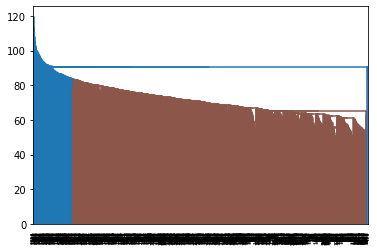

In [25]:
from scipy.cluster.hierarchy import linkage,dendrogram
z=linkage(dataXX)
dendrogram(z)

l'algorithme de classification hierarchique

In [26]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=20)
model.fit(dataXX)


AgglomerativeClustering(n_clusters=20)

In [27]:
pickle.dump(model, open('Modelhierarchique.sav', 'wb'))
    # np.save('logLabel',clf.labels_)
labels = model.labels_

In [7]:
result ={}

for i,val in enumerate(labels):
    if val not in result.keys():
        result[val]=[trainY[i]]
    else:
        result[val].append(trainY[i])
for key in result.keys():
    tmp = result[key]
    result[key] = max(set(tmp),key=tmp.count)
print(result)
with open('label2folder3' + '.pkl', 'wb') as f:
        pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

{17: '015.bonsai-101', 10: '001.ak47', 16: '019.boxing-glove', 14: '004.baseball-bat', 7: '002.american-flag', 2: '003.backpack', 0: '005.baseball-glove', 18: '016.boom-box', 1: '020.brain-101', 5: '007.bat', 4: '017.bowling-ball', 13: '008.bathtub', 19: '011.billiards', 6: '009.bear', 9: '010.beer-mug', 11: '012.binoculars', 3: '011.billiards', 12: '011.billiards', 8: '012.binoculars', 15: '014.blimp'}


calcul d'accuracy

In [29]:
with open('label2folder3' + '.pkl', 'rb') as f:
        tag = pickle.load(f)
#Load model

with open(filename, 'rb') as file:  
    clf = pickle.load(file)
print(testX)
testX = np.array(testX).astype(float)
trainY = list(clf.predict(np.array(testX)))
# print(type(trainY))

for index, val in enumerate(trainY):
    # print(val)
    trainY[index] = tag[val]
print('Accurancy: {}'.format(accuracy_score(TargetTestY,trainY)))

[[1.22308707 0.97246063 0.94888842 ... 0.         1.8410542  0.        ]
 [1.35191441 0.         1.69029009 ... 0.         0.         0.        ]
 [0.         0.         0.79146969 ... 0.         0.         0.        ]
 ...
 [0.         7.99123812 0.         ... 4.09729385 7.11456728 0.        ]
 [0.         4.17920494 0.         ... 0.         4.45485401 0.        ]
 [0.         0.         0.         ... 0.         3.29914999 0.        ]]
Accurancy: 0.0488914155770324


# l'interface graphique

In [16]:
import gradio as gr
model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
def classi(images):
    # img = image.load_img(img_path, target_size=(224, 224))
    x=np.array(images)
    x = image.img_to_array(images)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = model.predict(x)
    outp = clf.predict(np.array(feature,dtype=float))
    # resultat = str(result[outp])
    print(outp[0])
    return result[outp[0]]
imagess = gr.inputs.Image(shape=(224, 224))
iface = gr.Interface(fn=classi, inputs=imagess, outputs="text").launch()


Running on local URL:  http://127.0.0.1:7866/

To create a public link, set `share=True` in `launch()`.


zby
zby
zby
17
zby
zby
zby
16
zby
zby
zby
16
zby
zby
zby
14
zby
zby
zby
10
zby
zby
zby
10
zby
zby
zby
10
zby
zby
zby
14
zby
zby
zby
7
zby
zby
zby
5
zby
zby
zby
6
zby
zby
zby
16
zby
zby
zby
18
